In [1]:
import pandas as pd

# Load your news dataset
news_df = pd.read_csv(r"C:/10 Kifia Tasks/data/raw_analyst_ratings.csv")

# Load your stock dataset
stock_df = pd.read_csv(r"c:\10 Kifia Tasks\yfinance_data\META_historical_data.csv")

# Check the first few rows to confirm successful loading
print("News Data Sample:")
print(news_df.head())

print("\nStock Data Sample:")
print(stock_df.head())


News Data Sample:
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  2020-05-

In [2]:
print(news_df[['date']].head())


                        date
0  2020-06-05 10:30:54-04:00
1  2020-06-03 10:45:20-04:00
2  2020-05-26 04:30:07-04:00
3  2020-05-22 12:45:06-04:00
4  2020-05-22 11:38:59-04:00


In [3]:
news_df['date'] = pd.to_datetime(news_df['date'], errors='coerce').dt.date


In [4]:
# Convert news dataset timestamps to date only
news_df['date'] = pd.to_datetime(news_df['date']).dt.date

# Convert stock dataset dates to match the format
stock_df['date'] = pd.to_datetime(stock_df['Date']).dt.date


In [5]:
from textblob import TextBlob

def get_textblob_sentiment(text):
    return TextBlob(str(text)).sentiment.polarity  # Scale: -1 (negative) to +1 (positive)

# Apply to headlines
news_df['sentiment_score'] = news_df['headline'].apply(get_textblob_sentiment)


In [6]:
stock_df['daily_return'] = stock_df['Close'].pct_change() * 100


In [7]:
analysis_df = stock_df.merge(news_df[['date', 'sentiment_score']], on='date', how='inner')


In [8]:
correlation = analysis_df['sentiment_score'].corr(analysis_df['daily_return'])
print(f"Pearson correlation coefficient: {correlation}")


Pearson correlation coefficient: 0.02131570734866147


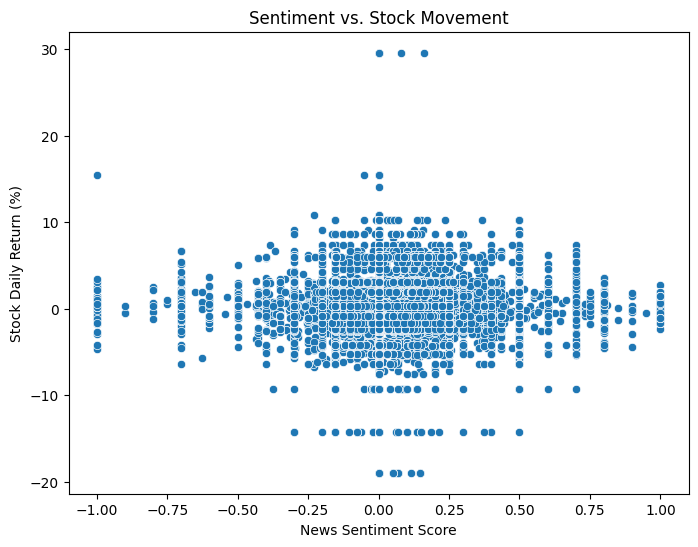

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=analysis_df['sentiment_score'], y=analysis_df['daily_return'])
plt.xlabel('News Sentiment Score')
plt.ylabel('Stock Daily Return (%)')
plt.title('Sentiment vs. Stock Movement')
plt.show()


In [10]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')  # Ensure VADER is available


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to extract sentiment scores
def get_vader_sentiment(text):
    return sid.polarity_scores(str(text))['compound']  # Returns score (-1 to +1)

# Apply function to headlines
news_df['sentiment_score'] = news_df['headline'].apply(get_vader_sentiment)


In [12]:
daily_sentiment = news_df.groupby('date')['sentiment_score'].mean().reset_index()


In [13]:
analysis_df = stock_df.merge(daily_sentiment, on='date', how='inner')


In [14]:
correlation = analysis_df['sentiment_score'].corr(analysis_df['daily_return'])
print(f"Pearson correlation coefficient: {correlation}")


Pearson correlation coefficient: -0.010554596306843068


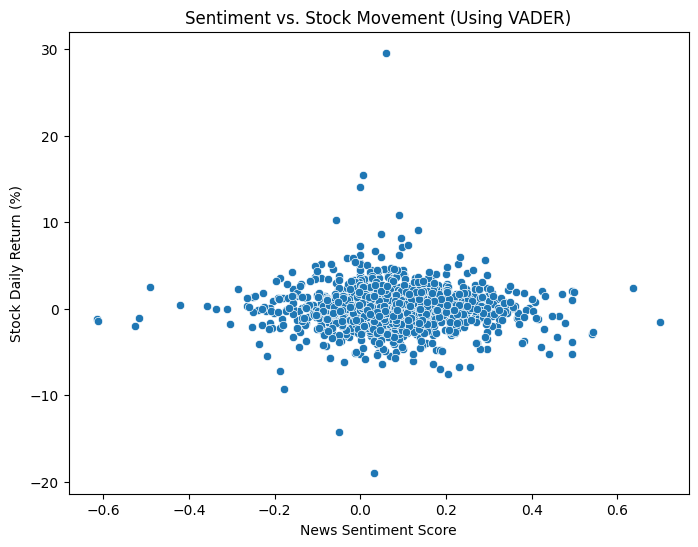

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x=analysis_df['sentiment_score'], y=analysis_df['daily_return'])
plt.xlabel('News Sentiment Score')
plt.ylabel('Stock Daily Return (%)')
plt.title('Sentiment vs. Stock Movement (Using VADER)')
plt.show()
